In [1]:
import pandas as pd
import matplotlib.pyplot as plt                            #Visualization Library
import seaborn as sns                                      #Advanced library for legend functions.
import numpy as np                                         #reading numerical data
import datetime as dt                                      #Understanding the date format
from datetime import timedelta                             #Time Duration
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR

In [2]:
covid=pd.read_csv('covid_19_data.csv')
covid.head() #returns first 5 colums

print("Size/Shape of the dataset",covid.shape)
print("Checking for null values \n",covid.isnull().sum())
print("Checking Data type:",covid.dtypes)

Size/Shape of the dataset (43721, 8)
Checking for null values 
 SNo                    0
ObservationDate        0
Province/State     18691
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
Checking Data type: SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [3]:
covid.drop(["SNo"],1,inplace=True) #inplace understands that is is dropped

covid.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [5]:
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

print("Basic information")
print("Total number of confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of Death cases around the world",datewise["Deaths"].iloc[-1])  #index location in the form of integers.-1 means starts from end
print("Total number of active cases around the world",datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1])
print("Total mumber of close cases",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])

Basic information
Total number of confirmed cases around the world 8173940.0
Total number of Recovered cases around the world 3955169.0
Total number of Death cases around the world 443685.0
Total number of active cases around the world 3775086.0
Total mumber of close cases 4398854.0


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146]),
 <a list of 147 Text major ticklabel objects>)

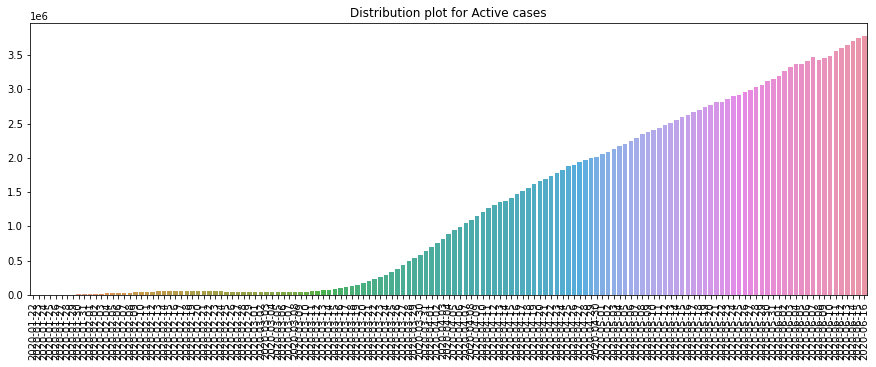

In [6]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distribution plot for Active cases")
plt.xticks(rotation=90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146]),
 <a list of 147 Text major ticklabel objects>)

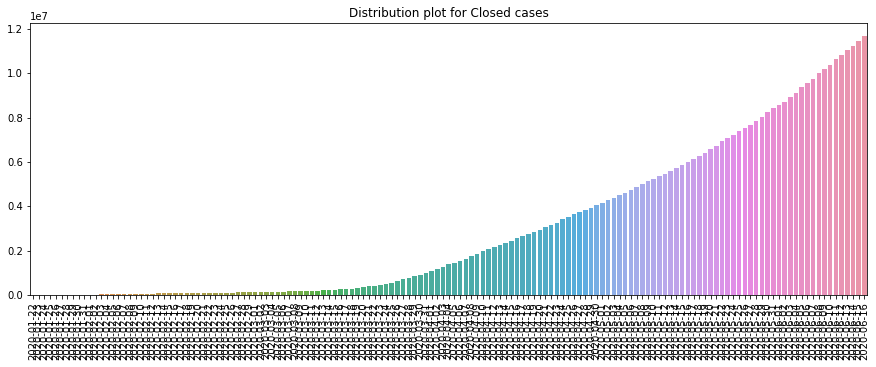

In [7]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]+datewise["Recovered"]-datewise["Deaths"])
plt.title("Distribution plot for Closed cases")
plt.xticks(rotation=90)  #for tick marks on the axis

Text(0.5, 1.0, 'Weekly Progress of different type of cases')

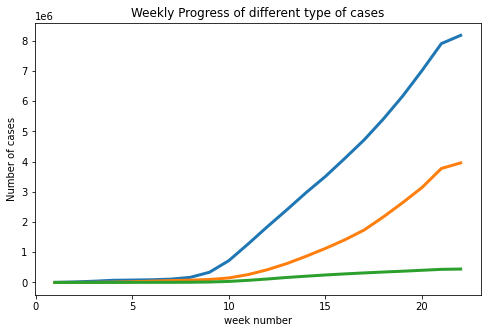

In [8]:
datewise["WeekofYear"]=datewise.index.weekofyear
week_num= []  #for next week projection
weekwise_confirmed =[]
weekwise_recovered = []
weekwise_deaths =[]
w = 1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.xlabel("week number")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different type of cases")

Average increase in the number of Confirmed cases everyday 55601.0
Average increase in the number of Recovered cases everyday 26906.0
Average increase in the number of Death cases everyday 3018.0


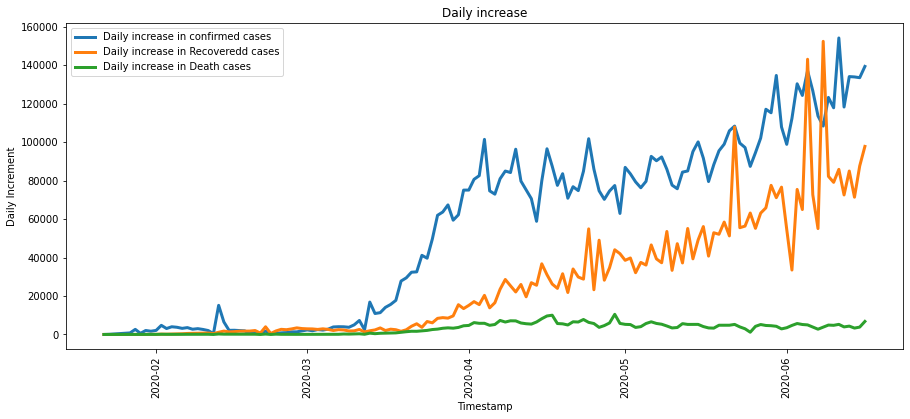

In [9]:
plt.figure(figsize = (15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth = 3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in Recoveredd cases",linewidth = 3) #diff means approximate values are taaken and filled in empty
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in Death cases",linewidth = 3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increment")
plt.title("Daily increase")
plt.xticks(rotation=90)
plt.legend()
print("Average increase in the number of Confirmed cases everyday",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in the number of Recovered cases everyday",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in the number of Death cases everyday",np.round(datewise["Deaths"].diff().fillna(0).mean()))

In [10]:
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending =False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

Text(0.5, 1.0, 'Top15 countries as per number of death cases')

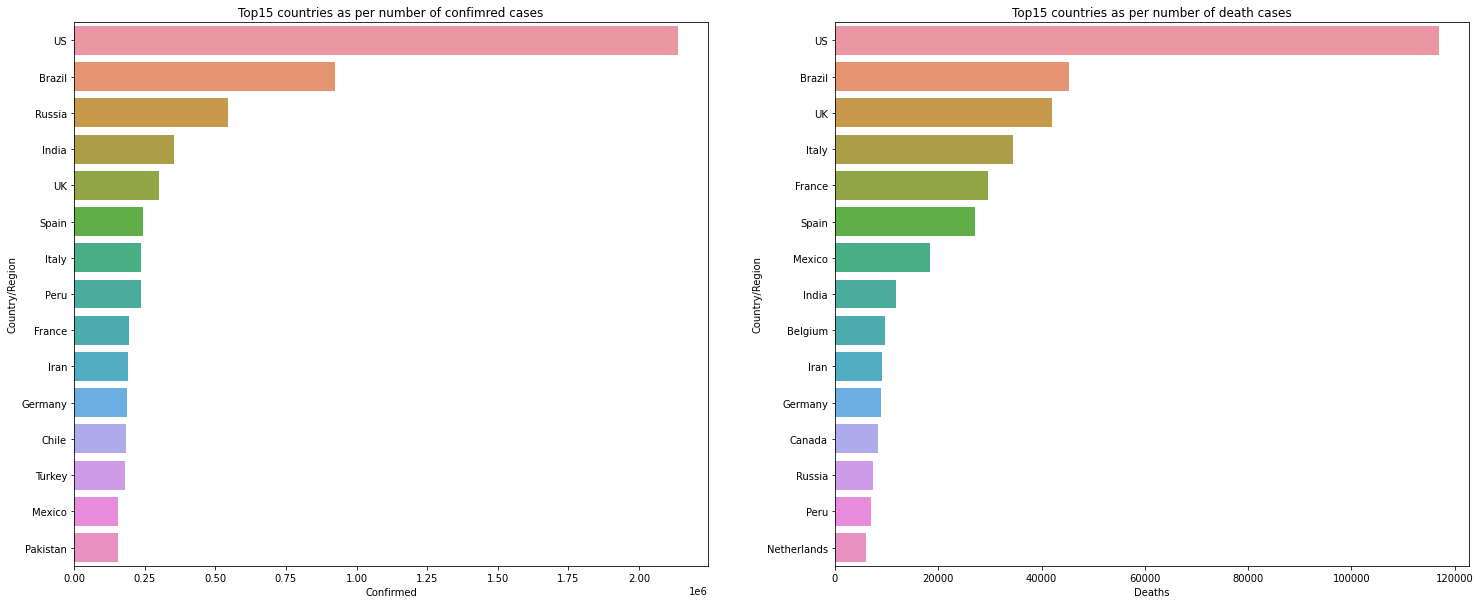

In [11]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (25,10))
top_15confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top15 countries as per number of confimred cases")
sns.barplot(x = top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax2.set_title("Top15 countries as per number of death cases")

In [12]:
#Data analysis for india
india_data = covid[covid["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Actvie Cases:",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed cases",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed    354065.0
Recovered    186935.0
Deaths        11903.0
Name: 2020-06-16 00:00:00, dtype: float64
Total Actvie Cases: 155227.0
Total Closed cases 198838.0


Text(0.5, 1.0, 'Weekly Progress of different types of cases')

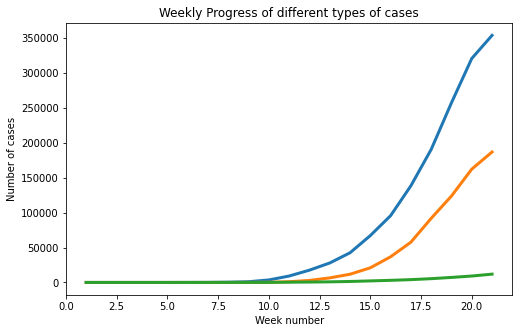

In [13]:
datewise_india["WeekofYear"] = datewise_india.index.weekofyear
week_num_india = []
india_weekwise_confirmed = []
india_weekwise_recovered = []
india_weekwise_deaths = []
w = 1
for i in list(datewise_india["WeekofYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekofYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w = w+1

plt.figure(figsize = (8,5))
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3)
plt.plot(week_num_india,india_weekwise_recovered,linewidth = 3)
plt.plot(week_num_india,india_weekwise_deaths,linewidth = 3)
plt.xlabel("Week number")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

In [14]:
max_ind = datewise_india["Confirmed"].max()
china_data = covid[covid["Country/Region"]=="Mainland China"]
Italy_data = covid[covid["Country/Region"]=="Italy"]
US_data = covid[covid["Country/Region"]=="US"]
spain_data = covid[covid["Country/Region"]=="Spain"]
datewise_china = china_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_US = US_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Spain = spain_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("It took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach",max_ind,"Confirmed Cases")
print("It took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach number of Confirmed cases to India")
print("It took",datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in US to reach number of Confirmed cases to India")
print("It took",datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)].shape[0],"days in Spain to reach number of Confirmed cases to India")
print("It took",datewise_china[(datewise_china["Confirmed"]>0)&(datewise_china["Confirmed"]<=max_ind)].shape[0],"days in China to reach number of Confirmed cases to India")

It took 139 days in India to reach 354065.0 Confirmed Cases
It took 138 days in Italy to reach number of Confirmed cases to India
It took 75 days in US to reach number of Confirmed cases to India
It took 137 days in Spain to reach number of Confirmed cases to India
It took 147 days in China to reach number of Confirmed cases to India


In [15]:
datewise["Days Since"] = datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0]*0.90)]
valid_ml = datewise.iloc[int(datewise.shape[0]*0.90):]
model_scores = []

In [16]:
lin_reg = LinearRegression(normalize=True)

In [17]:
svm = SVR(C=1,degree = 6,kernel= 'poly',epsilon=0.01,gamma='scale')

In [18]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=6, epsilon=0.01, gamma='scale',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [21]:
new_date = []
new_prediction_lr = []
new_prediction_svm = []
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x:'%.f' %x)
model_predictions = pd.DataFrame(list(zip(new_date,new_prediction_lr,new_prediction_svm)),columns = ["Dates","LINEAR REGRSN","SVM PREDICTION"])
model_predictions.head(10)

,Dates,LINEAR REGRSN,SVM PREDICTION
0,2020-06-17,5566424,15906944
1,2020-06-18,5613805,16560424
2,2020-06-19,5661185,17236359
3,2020-06-20,5708566,17935360
4,2020-06-21,5755947,18658053
5,2020-06-22,5803328,19405078
6,2020-06-23,5850709,20177084
7,2020-06-24,5898090,20974735
8,2020-06-25,5945471,21798709
9,2020-06-26,5992852,22649695
